In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df1 = pd.read_csv('data_sets/sleep_health.csv')
df2 = pd.read_csv('data_sets/refined_survey.csv')
merged_df = pd.concat([df1, df2], axis=0)


In [19]:
merged_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Unnamed: 0
0,1.0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200.0,NaN,NaN
1,2.0,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000.0,NaN,NaN
2,3.0,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000.0,NaN,NaN
3,4.0,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000.0,Sleep Apnea,NaN
4,5.0,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000.0,Sleep Apnea,NaN


In [20]:
merged_df.drop(columns=['Unnamed: 0'],inplace=True)

In [21]:
merged_df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1.0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200.0,NaN
1,2.0,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000.0,NaN
2,3.0,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000.0,NaN
3,4.0,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000.0,Sleep Apnea
4,5.0,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85.0,3000.0,Sleep Apnea


In [22]:
merged_df.columns
merged_df.drop(columns=['Person ID'], inplace=True)

In [23]:
merged_df.isnull().sum()

Gender                       0
Age                          0
Occupation                  48
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 1
Blood Pressure               1
Heart Rate                  48
Daily Steps                 48
Sleep Disorder             267
dtype: int64

In [24]:
merged_df.fillna(merged_df['BMI Category'].mode(), inplace=True) # filling categorical variable with mode
merged_df.fillna(merged_df['Blood Pressure'].mode(), inplace=True)

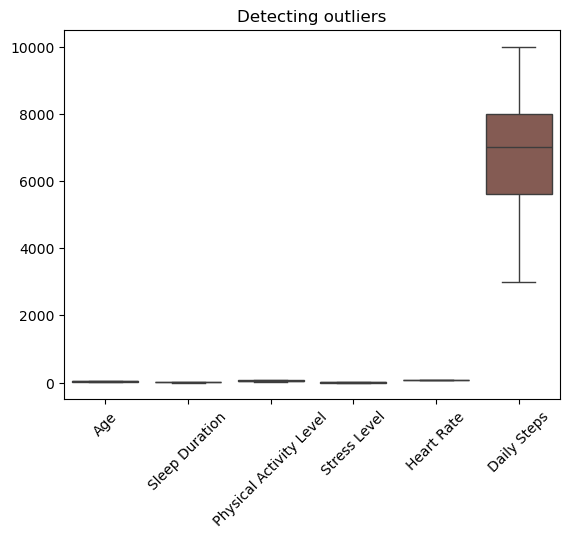

In [31]:
plt.Figure(figsize=(8,6))
sns.boxplot(data=merged_df)
plt.title("Detecting outliers")
plt.xticks(rotation=45)
plt.show()

In [26]:
# First, identify the outlier condition for the 'Heart Rate' and 'Sleep Duration' columns

# For 'Heart Rate' column:
Q1_hr = merged_df['Heart Rate'].quantile(0.25)
Q3_hr = merged_df['Heart Rate'].quantile(0.75)
IQR_hr = Q3_hr - Q1_hr
outliers_condition_hr = (merged_df['Heart Rate'] < (Q1_hr - 1.5 * IQR_hr)) | (merged_df['Heart Rate'] > (Q3_hr + 1.5 * IQR_hr))

# For 'Sleep Duration' column:
Q1_sd = merged_df['Sleep Duration'].quantile(0.25)
Q3_sd = merged_df['Sleep Duration'].quantile(0.75)
IQR_sd = Q3_sd - Q1_sd
outliers_condition_sd = (merged_df['Sleep Duration'] < (Q1_sd - 1.5 * IQR_sd)) | (merged_df['Sleep Duration'] > (Q3_sd + 1.5 * IQR_sd))

# Replace outliers with the median value
merged_df.loc[outliers_condition_hr, 'Heart Rate'] = merged_df['Heart Rate'].median()
merged_df.loc[outliers_condition_sd, 'Sleep Duration'] = merged_df['Sleep Duration'].median()

# Verify the changes
print(merged_df[outliers_condition_hr][['Heart Rate']])
print(merged_df[outliers_condition_sd][['Sleep Duration']])


     Heart Rate
3          70.0
4          70.0
5          70.0
6          70.0
16         70.0
18         70.0
80         70.0
81         70.0
93         70.0
145        70.0
147        70.0
264        70.0
266        70.0
276        70.0
277        70.0
    Sleep Duration
19             7.1
21             7.1


In [27]:
merged_df.nunique()

Gender                      2
Age                        40
Occupation                 11
Sleep Duration             32
Quality of Sleep            9
Physical Activity Level    40
Stress Level                8
BMI Category                4
Blood Pressure             27
Heart Rate                 12
Daily Steps                20
Sleep Disorder              2
dtype: int64

In [35]:
merged_df.isnull().sum()

Gender                       0
Age                          0
Occupation                  16
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 1
Blood Pressure               1
Heart Rate                  48
Daily Steps                 48
Sleep Disorder             267
dtype: int64

In [ ]:
merged_df.loc[(merged_df['Age'] < 25) & (merged_df['Occupation'].isna()),'Occupation'] = 'Student'

In [37]:
merged_df.loc[(merged_df['Age'] == 37) & (merged_df['Occupation'].isna()),'Occcupation'] = 'Health Assitant'

In [41]:
merged_df.to_csv('data_sets/final_response.csv')

In [196]:
df = pd.read_csv('data_sets/final_response.csv')

In [197]:
df.head()

,Unnamed: 0,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,Occcupation
0,0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77.0,4200.0,NaN,NaN
1,1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000.0,NaN,NaN
2,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75.0,10000.0,NaN,NaN
3,3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,70.0,3000.0,Sleep Apnea,NaN
4,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,70.0,3000.0,Sleep Apnea,NaN


In [198]:
df['Blood Pressure'].fillna(df['Blood Pressure'].mode()[0], inplace=True)

C:\Users\adabh\AppData\Local\Temp\ipykernel_20716\2216364181.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Blood Pressure'].fillna(df['Blood Pressure'].mode()[0], inplace=True)


In [199]:
df['BMI Category'].fillna(df['BMI Category'].mode()[0], inplace=True)

C:\Users\adabh\AppData\Local\Temp\ipykernel_20716\3360247212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['BMI Category'].fillna(df['BMI Category'].mode()[0], inplace=True)


In [200]:
df['Heart Rate'].value_counts()

Heart Rate
68.0    94
70.0    91
72.0    69
65.0    67
75.0    36
78.0     5
77.0     2
69.0     2
76.0     2
74.0     2
67.0     2
73.0     2
Name: count, dtype: int64

In [201]:
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Step 2: Define a function to classify Blood Pressure
def categorize_bp(row):
    systolic = row['Systolic']
    diastolic = row['Diastolic']
    
    if systolic < 90 or diastolic < 60:
        return 'Low'
    elif 90 <= systolic <= 120 and 60 <= diastolic <= 80:
        return 'Normal'
    elif 120 < systolic <= 139 or 80 < diastolic <= 89:
        return 'Elevated'
    elif 140 <= systolic <= 159 or 90 <= diastolic <= 99:
        return 'High'
    else:
        return 'Hypertension'

# Step 3: Apply the function to create a new column
df['BP Category'] = df.apply(categorize_bp, axis=1)

# Step 4: Drop unnecessary columns (Optional)
df.drop(columns=['Systolic', 'Diastolic'], inplace=True)
df.drop(columns=['Blood Pressure'], inplace=True)

# Display the DataFrame
print(df)

     Unnamed: 0 Gender  Age            Occupation  Sleep Duration  \
0             0   Male   27     Software Engineer             6.1   
1             1   Male   28                Doctor             6.2   
2             2   Male   28                Doctor             6.2   
3             3   Male   28  Sales Representative             5.9   
4             4   Male   28  Sales Representative             5.9   
..          ...    ...  ...                   ...             ...   
417         417   Male   21               Student             4.5   
418         418   Male   20               Student             7.0   
419         419   Male   23               Student             5.0   
420         420   Male   22               Student             6.0   
421         421   Male   38        Foreign Worker             7.0   

    Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                  6                       42             6   Overweight   
1                  

In [202]:
df['BP Category'].unique()


array(['Elevated', 'High', 'Normal', 'Hypertension'], dtype=object)

In [203]:
# Identify rows with NaN in 'Heart Rate'
import numpy as np

# Identify rows with NaN in 'Heart Rate'
nan_rows = df[df['Heart Rate'].isna()]

# Loop through each BP Category
for category in df['BP Category'].unique():
    # Get non-null heart rates for that BP category
    valid_heart_rates = df[df['BP Category'] == category]['Heart Rate'].dropna().values  # Convert to array
    
    # Check if there are valid values to sample from
    mask = (df['BP Category'] == category) & (df['Heart Rate'].isna())
        
        # Randomly sample and assign to NaN values in the same category
        # Ensure the number of samples corresponds to the number of NaN values
    if valid_heart_rates.size > 0:
        df.loc[mask, 'Heart Rate'] = np.random.choice(valid_heart_rates, size=mask.sum(), replace=True)


In [204]:
df.isnull().sum()

Unnamed: 0                   0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Heart Rate                   1
Daily Steps                 48
Sleep Disorder             267
Occcupation                422
BP Category                  0
dtype: int64

In [205]:

df['Heart Rate'].fillna(80.0, inplace=True)

C:\Users\adabh\AppData\Local\Temp\ipykernel_20716\755959704.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Heart Rate'].fillna(80.0, inplace=True)


In [207]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [213]:
df['Occcupation']=df['Occcupation'].astype('object')

### EDA

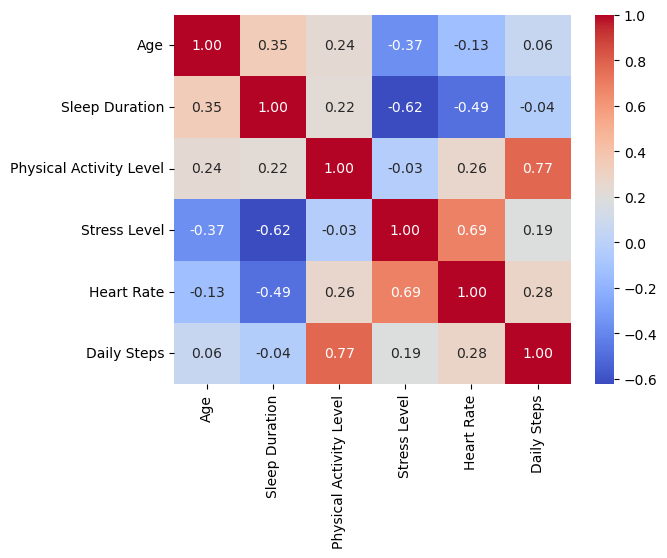

In [214]:
data = df.select_dtypes(include='number')
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

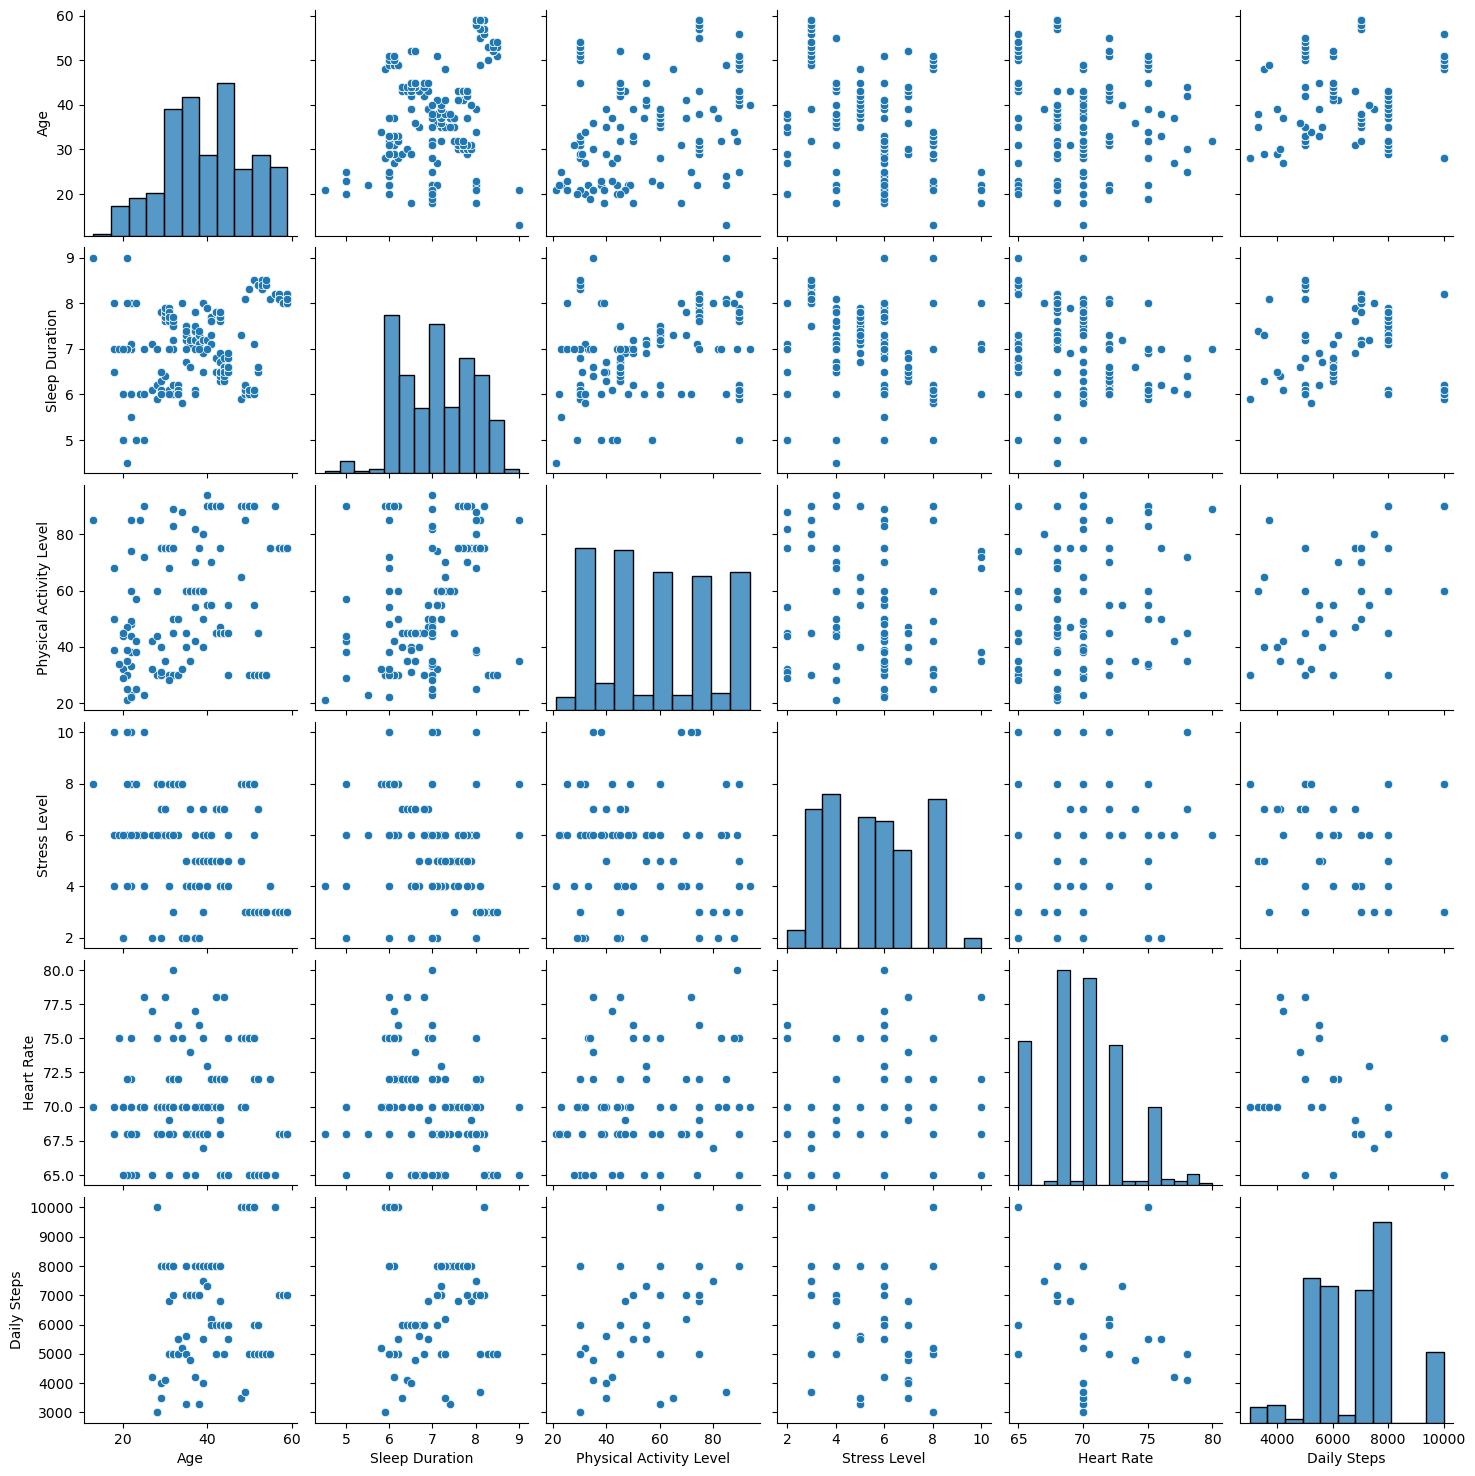

In [216]:

sns.pairplot(data)
plt.show()

In [170]:
df.dtypes

Unnamed: 0                   int64
Gender                      object
Age                          int64
Occupation                  object
Sleep Duration             float64
Quality of Sleep            object
Physical Activity Level      int64
Stress Level                 int64
BMI Category                object
Heart Rate                 float64
Daily Steps                float64
Sleep Disorder              object
Occcupation                float64
BP Category                 object
dtype: object

In [171]:
df.groupby('Occupation')['Occupation'].value_counts()

Occupation
Accountant              37
Doctor                  71
Engineer                64
Foreign Worker           6
Health Assistant         2
Health Worker            2
Housewife                3
Lawyer                  47
Manager                  1
Nurse                   73
Sales Representative     2
Salesperson             32
Scientist                4
Software Engineer        4
Student                 34
Teacher                 40
Name: count, dtype: int64

In [172]:
df.isnull().sum()

Unnamed: 0                   0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Heart Rate                   0
Daily Steps                 48
Sleep Disorder             267
Occcupation                422
BP Category                  0
dtype: int64

In [173]:
df.shape

(422, 14)

In [174]:
df.drop(df.columns[-2], axis=1, inplace=True)

In [175]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep', 'Physical Activity Level', 'Stress Level',
       'BMI Category', 'Heart Rate', 'Daily Steps', 'Sleep Disorder',
       'BP Category'],
      dtype='object')

In [176]:
df.isnull().sum()


Unnamed: 0                   0
Gender                       0
Age                          0
Occupation                   0
Sleep Duration               0
Quality of Sleep             0
Physical Activity Level      0
Stress Level                 0
BMI Category                 0
Heart Rate                   0
Daily Steps                 48
Sleep Disorder             267
BP Category                  0
dtype: int64

In [177]:
df = pd.get_dummies(df, columns=['Gender'], drop_first=True)


In [181]:
df.drop(columns=['Unnamed: 0'], inplace=True)


In [183]:
df = pd.get_dummies(df, columns=['BP Category'], drop_first=True)

df.head()

,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Sleep Disorder,Gender_Male,BMI Category_Normal Weight,BMI Category_Obese,BMI Category_Overweight,BP Category_High,BP Category_Hypertension,BP Category_Normal
0,27,Software Engineer,6.1,6,42,6,77.0,4200.0,NaN,True,False,False,True,False,False,False
1,28,Doctor,6.2,6,60,8,75.0,10000.0,NaN,True,False,False,False,False,False,False
2,28,Doctor,6.2,6,60,8,75.0,10000.0,NaN,True,False,False,False,False,False,False
3,28,Sales Representative,5.9,4,30,8,70.0,3000.0,Sleep Apnea,True,False,True,False,True,False,False
4,28,Sales Representative,5.9,4,30,8,70.0,3000.0,Sleep Apnea,True,False,True,False,True,False,False


In [187]:
def quality_of_sleep(value):
    if value == 'Average':
        return np.random.randint(4,6)
    if value == 'Good':
        return np.random.randint(7,9)
    if value == 'Poor':
        return np.random.randint(1,3)
    
df['Quality of Sleep'] = df['Quality of Sleep'].apply(quality_of_sleep)

In [188]:
df.dtypes

Age                             int64
Occupation                     object
Sleep Duration                float64
Quality of Sleep              float64
Physical Activity Level         int64
Stress Level                    int64
Heart Rate                    float64
Daily Steps                   float64
Sleep Disorder                 object
Gender_Male                      bool
BMI Category_Normal Weight       bool
BMI Category_Obese               bool
BMI Category_Overweight          bool
BP Category_High                 bool
BP Category_Hypertension         bool
BP Category_Normal               bool
dtype: object

In [190]:
df.isnull().sum()

Age                             0
Occupation                      0
Sleep Duration                  0
Quality of Sleep              374
Physical Activity Level         0
Stress Level                    0
Heart Rate                      0
Daily Steps                    48
Sleep Disorder                267
Gender_Male                     0
BMI Category_Normal Weight      0
BMI Category_Obese              0
BMI Category_Overweight         0
BP Category_High                0
BP Category_Hypertension        0
BP Category_Normal              0
dtype: int64

In [195]:
df.drop(columns=['Daily Steps'], inplace=True)

In [191]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Assuming 'Gender' is a categorical column and 'Sleep Disorder' is the target variable
X = df.drop(columns=['Sleep Disorder','Occupation',])  # Features
y = df['Daily Steps']  # Target variable


# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


ValueError: Input y contains NaN.